## GENERALES

In [61]:
import pandas as pd  # Para el manejo de dataframes
import numpy as np   # Para la creación de arrays y el manejo de estadísticas
import missingno as msno  # Utilizada en la visualización de valores nulos

In [62]:
# Posibles valores nulos
strings_na = [
    "missing", "NA", "N A", "N/A", "#N/A", "NA ", " NA", 
    "N /A", "N / A", " N / A", "N / A ", "na", "n a", 
    "n/a", "na ", " na", "n /a", "n / a", " a / a", "n / a ", 
    "NULL", "null", "", "?", "*", "."
]

## CLAP

In [63]:
# Lee el archivo CSV
clap_csv = '../datos/csv/brutos/CLAP.csv'  
df_clap = pd.read_csv(clap_csv)

In [64]:
# Muestra 5 filas aleatorias del dataframe df_clap
df_clap.sample(5, random_state=4)

,INICIO_TARJETA,FINAL_TARJETA,TIPO_TRX,MONTO,FECHA_TRANSACCION,CODIGO_AUTORIZACION,ID_BANCO,FECHA_RECEPCION_BANCO
49998,818156.0,7711,PAGADA,217.0,2020-11-01 18:59:41.000,571823,7.322814e+11,2020-11-02
2836,442732.0,4154,PAGADA,42.0,2020-11-01 05:05:11.000,051123,2.274664e+11,2020-11-02
151913,954015.0,9520,PAGADA,102.0,2020-11-01 02:42:58.000,525264,9.935609e+11,2020-11-01
143638,492398.0,7252,PAGADA,136.0,2020-11-01 01:56:35.000,063571,2.931416e+11,2020-11-01
119398,818156.0,2278,PAGADA,118.0,2020-11-01 00:07:36.000,892616,5.981327e+11,2020-11-01


### VALORES DE LAS COLUMNAS

In [65]:
# Muestra información sobre el dataframe df_clap
df_clap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163549 entries, 0 to 163548
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INICIO_TARJETA         163543 non-null  float64
 1   FINAL_TARJETA          163549 non-null  int64  
 2   TIPO_TRX               163549 non-null  object 
 3   MONTO                  163549 non-null  float64
 4   FECHA_TRANSACCION      163549 non-null  object 
 5   CODIGO_AUTORIZACION    150870 non-null  object 
 6   ID_BANCO               163533 non-null  float64
 7   FECHA_RECEPCION_BANCO  163549 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


In [66]:
# Se modifican las columnas de fecha a un formato correcto
df_clap['FECHA_TRANSACCION'] = pd.to_datetime(df_clap['FECHA_TRANSACCION'], format='%Y-%m-%d %H:%M:%S.%f')
df_clap['FECHA_RECEPCION_BANCO'] = pd.to_datetime(df_clap['FECHA_RECEPCION_BANCO'])

In [69]:
# Reemplazar NaN con cero
df_clap['INICIO_TARJETA'].fillna(0, inplace=True)

# Convertir la columna de float64 a int
df_clap['INICIO_TARJETA'] = df_clap['INICIO_TARJETA'].astype(int)

### LIMPIEZA

#### NULOS

In [70]:
# Se reemplazan valores nulos por np.nan
df_clap = df_clap.replace(
    to_replace=strings_na,
    value=np.nan
)

<AxesSubplot:>

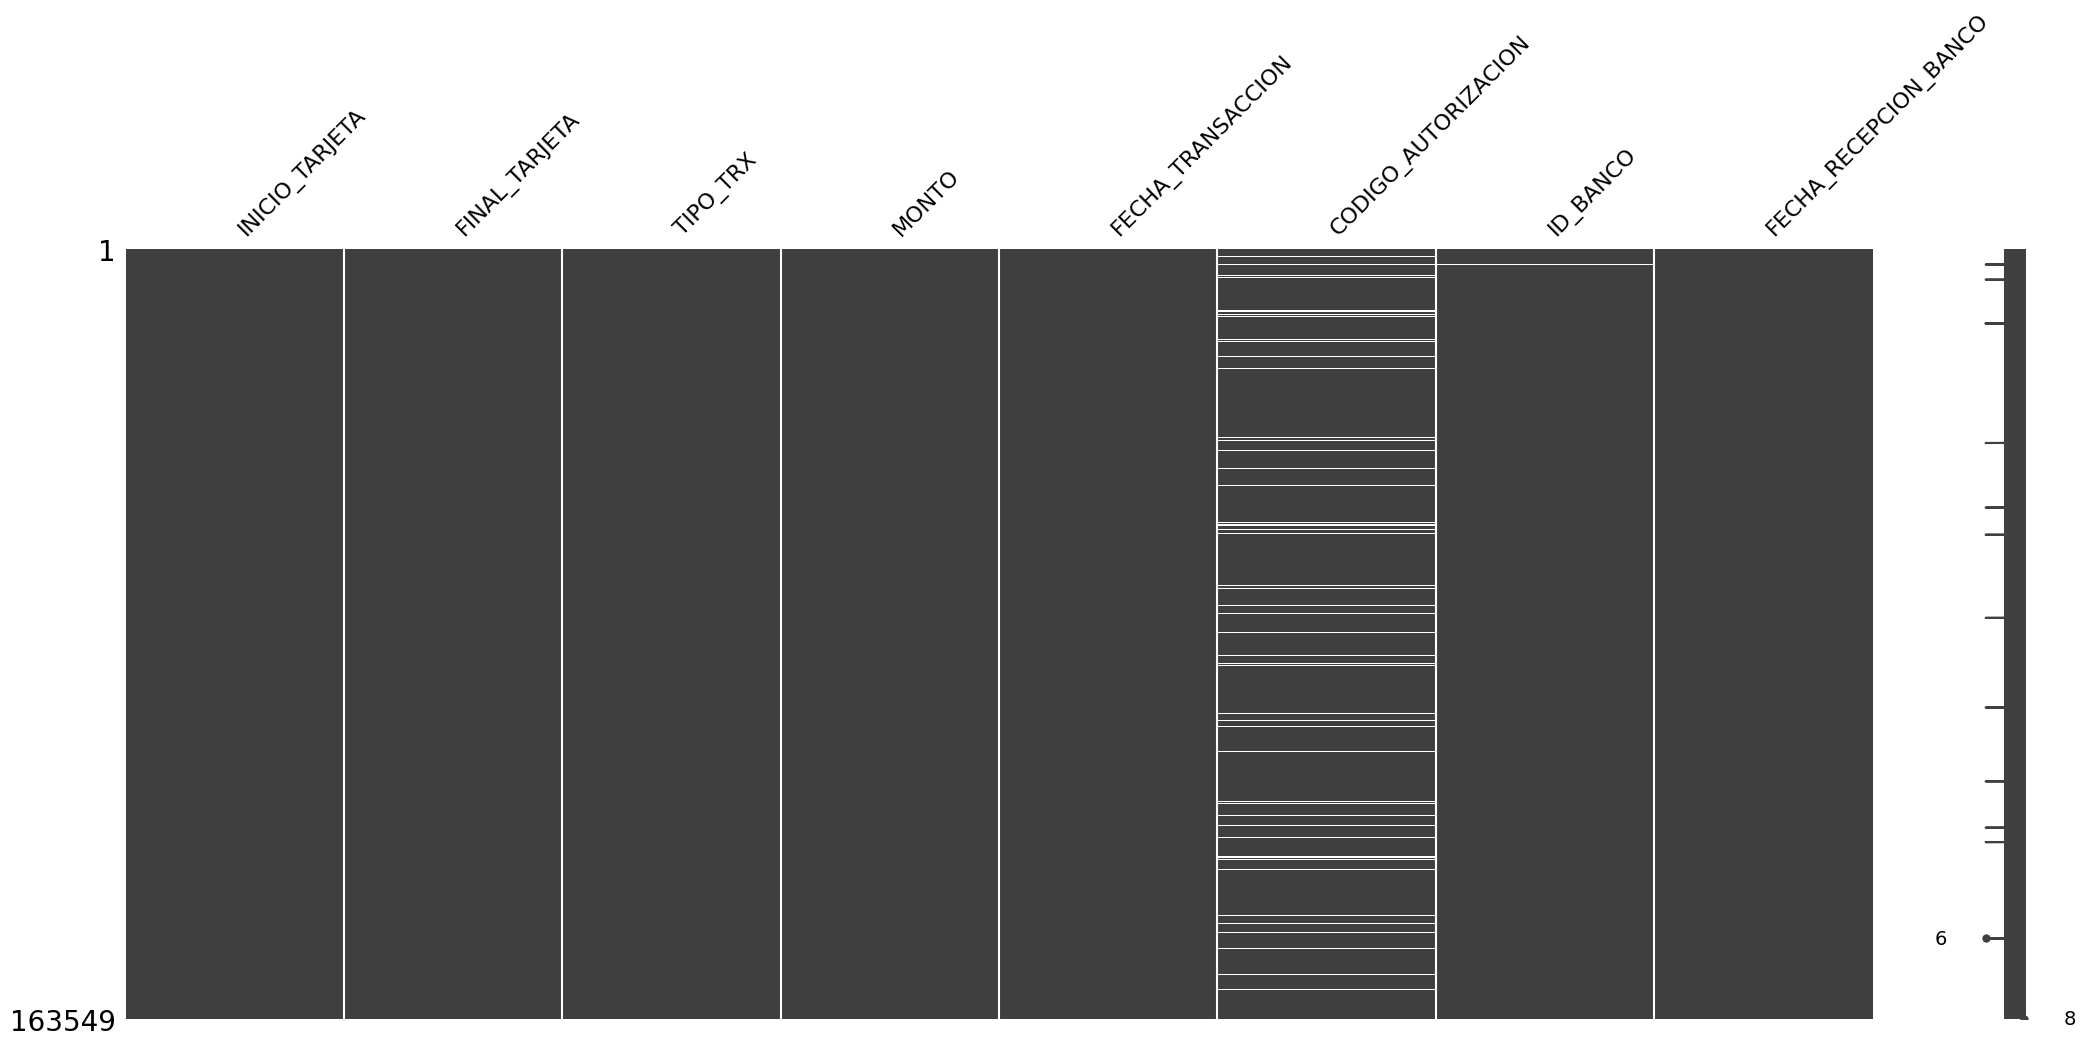

In [71]:
# Crea una matriz de visualización de valores nulos utilizando missingno
msno.matrix(df_clap)


In [72]:
#Nulos por columnas
df_clap.isnull().sum()

INICIO_TARJETA               0
FINAL_TARJETA                0
TIPO_TRX                     0
MONTO                        0
FECHA_TRANSACCION            0
CODIGO_AUTORIZACION      12679
ID_BANCO                    16
FECHA_RECEPCION_BANCO        0
dtype: int64

In [73]:
# Se crea una nueva fila que indica si hay valores faltantes en la fila
df_clap['FALTANTES'] = df_clap.apply(lambda row: 'VERIFICAR' if row.isnull().any() else 'COMPLETO', axis=1)


In [74]:
# Se corrigen valores nulos asignados para el conteo como np.nan, a un valor válido en SQL
for columna in df_clap.columns:
    if df_clap[columna].dtype == 'object':  # Para columnas de tipo cadena
       df_clap[columna].fillna('', inplace=True)
    elif pd.api.types.is_datetime64_ns_dtype(df_clap[columna]):  # Para columnas de fecha
        df_clap[columna].fillna('0000-00-00 00:00:00', inplace=True) 
    elif pd.api.types.is_numeric_dtype(df_clap[columna]):  # Para columnas numéricas
        df_clap[columna].fillna(0, inplace=True)


In [75]:
# Dividir la columna fecha_transaccion en partes separadas
df_clap['HORA_TRANSACCION'] = df_clap['FECHA_TRANSACCION'].dt.hour
df_clap['MINUTO_TRANSACCION'] = df_clap['FECHA_TRANSACCION'].dt.minute
df_clap['FECHA_TRANSACCION'] = df_clap['FECHA_TRANSACCION'].dt.strftime('%Y-%m-%d')


In [76]:
# Se transforman las columnas de fecha a un formato adecuado
df_clap['FECHA_TRANSACCION'] = pd.to_datetime(df_clap['FECHA_TRANSACCION'])
df_clap['FECHA_RECEPCION_BANCO'] = pd.to_datetime(df_clap['FECHA_RECEPCION_BANCO'])


In [77]:
# Calcula el número de filas con valores faltantes y filas completas en el dataframe df_clap
df_clap_filas_faltantes = df_clap.loc[df_clap['FALTANTES'] == 'VERIFICAR'].shape[0]
df_clap_filas_completas = df_clap.loc[df_clap['FALTANTES'] == 'COMPLETO'].shape[0]


In [78]:
# Cálculo y presentación de la cantidad de filas con y sin datos faltantes
mensaje_faltantes = 'Cantidad de filas con datos faltantes: ' + str(df_clap_filas_faltantes)
mensaje_completas = 'Cantidad de filas sin datos faltantes: ' + str(df_clap_filas_completas)

print(mensaje_faltantes)
print(mensaje_completas)

Cantidad de filas con datos faltantes: 12680
Cantidad de filas sin datos faltantes: 150869


## OBSERVACIONES

El conjunto de datos de CLAP consta de **12,680** filas, algunas de las cuales contienen datos faltantes que deben ser relevados.


### GUARDADO DATOS

#### FORMATO CSV

In [79]:
# Guarda el dataframe df_clap en un archivo CSV procesado
df_clap.to_csv('../datos/csv/procesados/CLAP.csv', index=False)

### FORMATO QUERY SQL DDL

<span style="color: red"> **IMPORTANTE:** El siguiente query puede variar en funcionamiento de acuerdo al DBMS. En este caso, se hará uso de SQLite3 mediante el volcado directo de los datos de los archivos .csv limpios a las tablas.</span>


In [80]:
# Genera consultas SQL INSERT a partir de los datos del dataframe df_clap
consultas_sql = []
for index, row in df_clap.iterrows():
    consulta = f"INSERT INTO CLAP (INICIO_TARJETA, FINAL_TARJETA, TIPO_TRX, MONTO, FECHA_TRANSACCION, CODIGO_AUTORIZACION, ID_BANCO, FECHA_RECEPCION_BANCO) VALUES ({row['INICIO_TARJETA']}, {row['FINAL_TARJETA']}, '{row['TIPO_TRX']}', {row['MONTO']}, '{row['FECHA_TRANSACCION']}', {row['CODIGO_AUTORIZACION']}, {row['ID_BANCO']}, '{row['FECHA_RECEPCION_BANCO']}');"
    consultas_sql.append(consulta)

# Guarda las consultas SQL en un archivo
clap_sql = '../datos/sql/CLAP.sql'
with open(clap_sql, 'w') as f:
    for consulta in consultas_sql:
        f.write(consulta + '\n')

print("Consultas SQL generadas y guardadas en", clap_sql)

Consultas SQL generadas y guardadas en ../datos/sql/CLAP.sql


## BANSUR

In [81]:
# Lee el archivo CSV de datos de BANSUR
bansur_csv = '../datos/csv/brutos/BANSUR.csv' 
df_bansur = pd.read_csv(bansur_csv)


In [82]:
# Muestra 3 filas aleatorias del dataframe df_bansur
sample_bansur = df_bansur.sample(4, random_state=5)


### VALORES DE LAS COLUMNAS

In [83]:
# Muestra información sobre el dataframe df_bansur
df_bansur.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132396 entries, 0 to 132395
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARJETA              132396 non-null  int64  
 1   TIPO_TRX             132396 non-null  object 
 2   MONTO                132396 non-null  float64
 3   FECHA_TRANSACCION    132396 non-null  int64  
 4   CODIGO_AUTORIZACION  132396 non-null  object 
 5   ID_ADQUIRIENTE       132396 non-null  int64  
 6   FECHA_RECEPCION      132396 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 7.1+ MB


In [84]:
# Transforma las columnas de fecha a un formato adecuado en el dataframe df_bansur
df_bansur['FECHA_TRANSACCION'] = pd.to_datetime(df_bansur['FECHA_TRANSACCION'], format='%Y%m%d')
df_bansur['FECHA_RECEPCION'] = pd.to_datetime(df_bansur['FECHA_RECEPCION'])


In [85]:
# Muestra 3 filas aleatorias del dataframe df_bansur
sample_bansur = df_bansur.sample(4, random_state=5)


### LIMPIEZA

#### NULOS

In [86]:
# Reemplaza los valores que coinciden con las convenciones de valores nulos en el dataframe df_bansur
df_bansur = df_bansur.replace(
    to_replace=strings_na,
    value=np.nan
)


<AxesSubplot:>

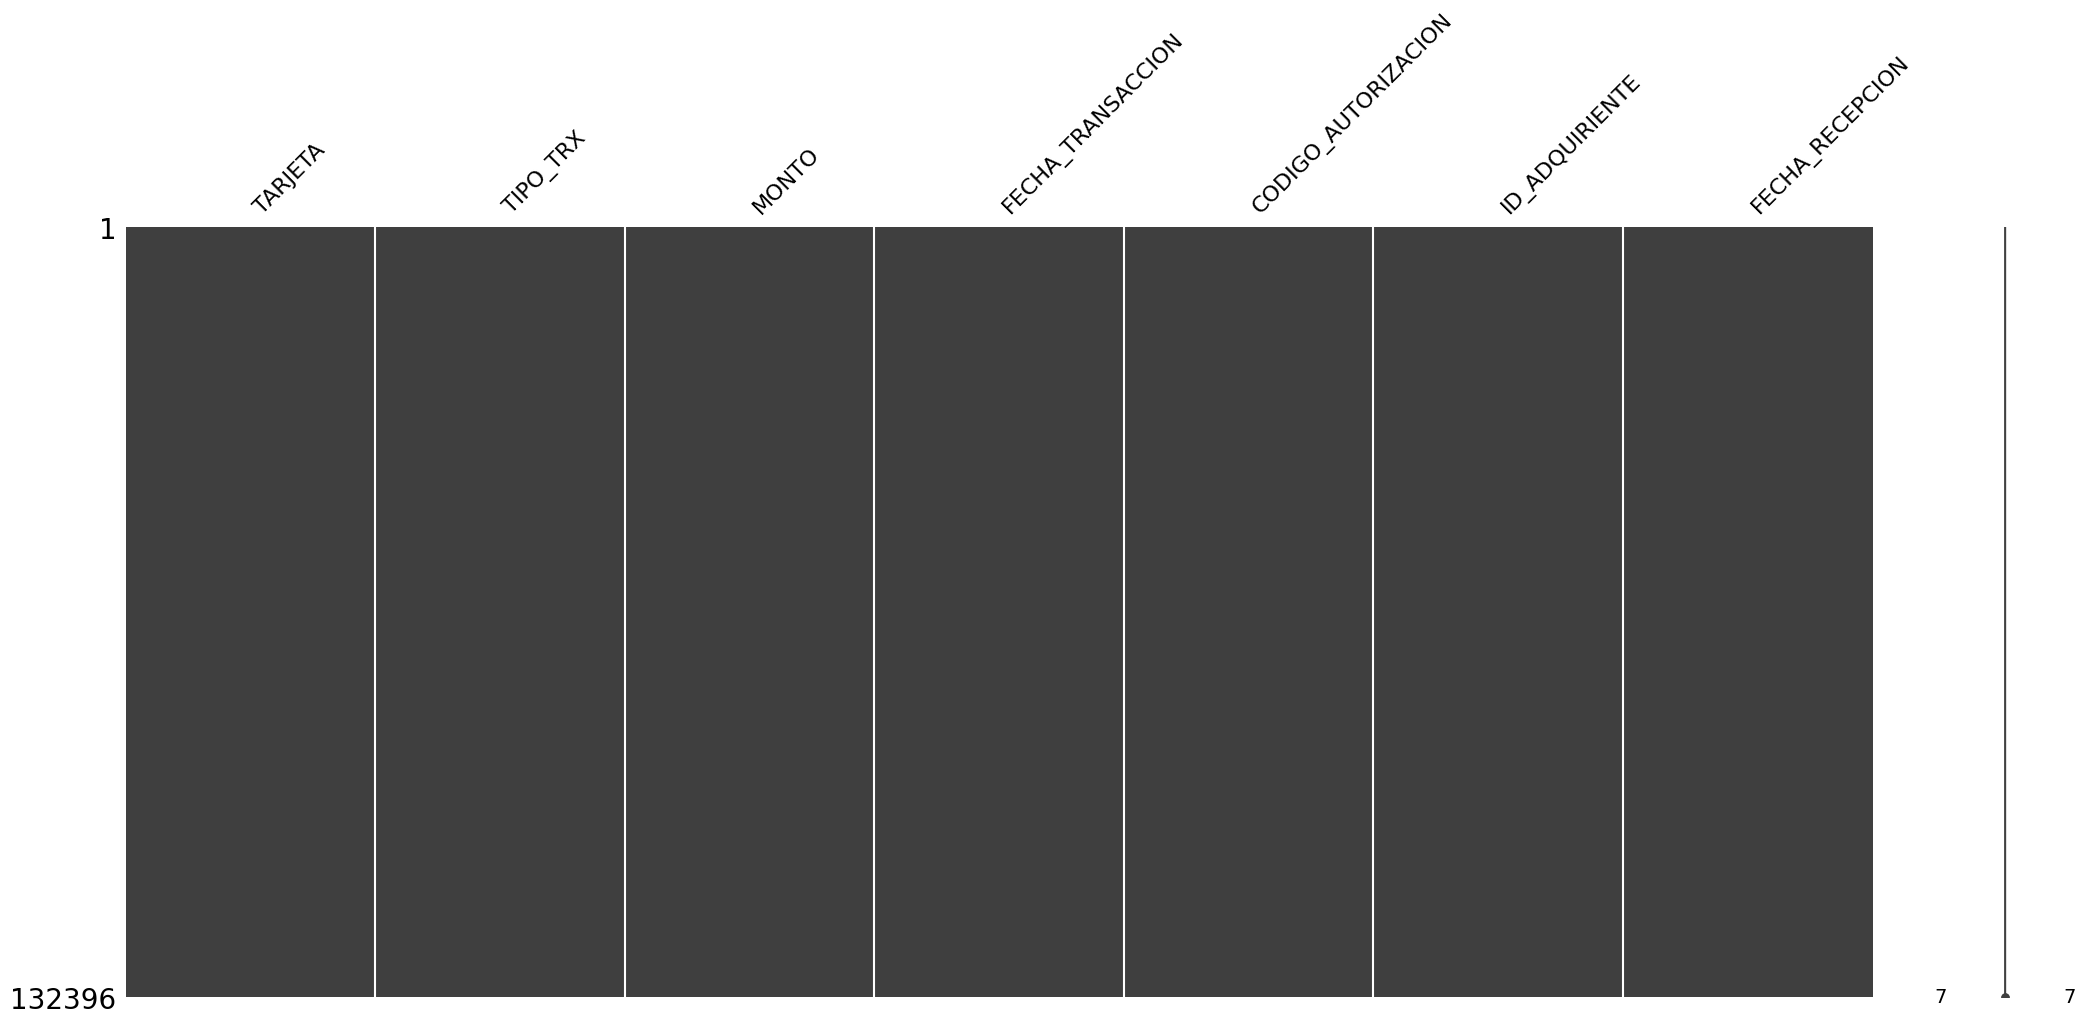

In [87]:
# Crea una matriz de visualización de valores nulos utilizando missingno para el dataframe df_bansur
msno.matrix(df_bansur)


In [88]:
# Crea una nueva columna que indica si hay valores faltantes en la fila en el dataframe df_bansur
df_bansur['FALTANTES'] = df_bansur.apply(lambda row: 'VERIFICAR' if row.isnull().any() else 'COMPLETO', axis=1)

# Calcula la cantidad de filas con valores faltantes y completas en el dataframe df_bansur
df_bansur_filas_faltantes = df_bansur.loc[df_bansur['FALTANTES'] == 'VERIFICAR'].shape[0]
df_bansur_filas_completas = df_bansur.loc[df_bansur['FALTANTES'] == 'COMPLETO'].shape[0]

In [89]:
# Transforma las columnas de fecha a un formato adecuado en el dataframe df_bansur
df_bansur['FECHA_TRANSACCION'] = pd.to_datetime(df_bansur['FECHA_TRANSACCION'])
df_bansur['FECHA_RECEPCION'] = pd.to_datetime(df_bansur['FECHA_RECEPCION'])


## OBSERVACIONES

No se encontraron observaciones. Los datos están limpios y completos, sin caracteres extraños ni valores nulos.


### GUARDADO DATOS


#### FORMATO CSV


In [90]:
# Guarda el dataframe df_bansur en un archivo CSV procesado
df_bansur.to_csv('../datos/csv/procesados/BANSUR.CSV', index=False)


### FORMATO QUERY SQL DDL

<span style="color: red"> **IMPORTANTE:** El siguiente query puede variar en funcionamiento de acuerdo al DBMS. En este caso, se hará uso de SQLite3 mediante el volcado directo de los datos de los archivos .csv limpios a las tablas.</span>


In [91]:
# Genera consultas SQL INSERT a partir de los datos del dataframe df_bansur
consultas_sql = []
for index, row in df_bansur.iterrows():
    consulta = f"INSERT INTO bansur (TARJETA, TIPO_TRX, MONTO, FECHA_TRANSACCION, CODIGO_AUTORIZACION, ID_ADQUIRIENTE, FECHA_RECEPCION) VALUES ({row['TARJETA']}, '{row['TIPO_TRX']}', {row['MONTO']}, '{row['FECHA_TRANSACCION']}', {row['CODIGO_AUTORIZACION']}, {row['ID_ADQUIRIENTE']}, '{row['FECHA_RECEPCION']}');"
    consultas_sql.append(consulta)

# Guarda las consultas SQL en un archivo
bansur_sql = '../datos/sql/bansur.sql'
with open(bansur_sql, 'w') as f:
    for consulta in consultas_sql:
        f.write(consulta + '\n')

print("Consultas SQL generadas y guardadas en", bansur_sql)


Consultas SQL generadas y guardadas en ../datos/sql/bansur.sql
